# Música e Saúde Mental

In [1]:
#importando bibliotecas
import pandas as pd 
#biblioteca para construir graficos.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.shape

(736, 33)

In [4]:
df.columns.to_list()

['Timestamp',
 'Age',
 'Primary streaming service',
 'Hours per day',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'BPM',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Anxiety',
 'Depression',
 'Insomnia',
 'OCD',
 'Music effects',
 'Permissions']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [7]:
df2=df.copy()
# Remover linhas com dados faltantes
df2 = df2.dropna()

# Exibir o DataFrame resultante
print(df2) 


               Timestamp   Age Primary streaming service  Hours per day  \
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
5     8/27/2022 21:56:50  18.0                   Spotify            5.0   
6     8/27/2022 22:00:29  18.0             YouTube Music            3.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
2              No      

In [8]:

# Verificar se as colunas existem no DataFrame
colunas_relevantes = ['Age','Fav genre','Anxiety','Frequency','Depression', 'Insomnia', 'OCD','Music effects']
colunas_existentes = [col for col in colunas_relevantes if col in df2.columns]

# Selecionar apenas as colunas relevantes que existem no DataFrame
df_relevantes = df2[colunas_existentes]

# Exibir o DataFrame resultante
print(df_relevantes)


      Age         Fav genre  Anxiety  Depression  Insomnia  OCD Music effects
2    18.0  Video game music      7.0         7.0      10.0  2.0     No effect
3    61.0              Jazz      9.0         7.0       3.0  3.0       Improve
4    18.0               R&B      7.0         2.0       5.0  9.0       Improve
5    18.0              Jazz      8.0         8.0       7.0  7.0       Improve
6    18.0  Video game music      4.0         8.0       6.0  0.0       Improve
..    ...               ...      ...         ...       ...  ...           ...
731  17.0              Rock      7.0         6.0       0.0  9.0       Improve
732  18.0               Pop      3.0         2.0       2.0  5.0       Improve
733  19.0               Rap      2.0         2.0       2.0  2.0       Improve
734  19.0         Classical      2.0         3.0       2.0  1.0       Improve
735  29.0           Hip hop      2.0         2.0       2.0  5.0       Improve

[616 rows x 7 columns]


C:\Users\Eduardo Ramon\AppData\Local\Temp\ipykernel_14092\3622597591.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


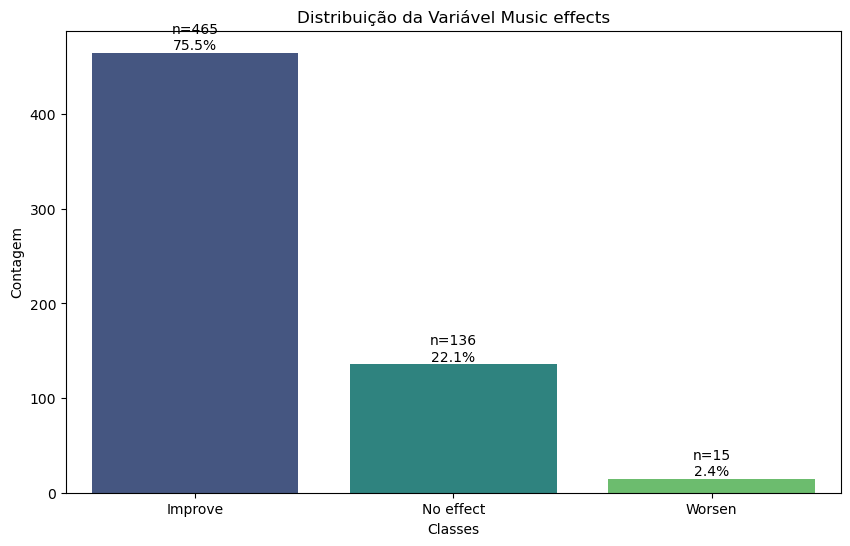

In [9]:
# Calcular contagens e percentuais
counts = df_relevantes['Music effects'].value_counts()
percentages = df_relevantes['Music effects'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Adicionar rótulos com contagem e percentual em cada barra
for i, (count, percentage) in enumerate(zip(counts.values, percentages)):
    bars.text(i, count, f'n={count}\n{percentage:.1f}%', 
             ha='center', va='bottom')

# Customizar o gráfico
plt.title('Distribuição da Variável Music effects')
plt.xlabel('Classes')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

In [10]:
df_relevantes['target_binary'] = df_relevantes['Music effects'].apply(lambda x: 'Improve' if x == 'Improve' else 'No Improve')

C:\Users\Eduardo Ramon\AppData\Local\Temp\ipykernel_14092\1277806870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['target_binary'] = df_relevantes['Music effects'].apply(lambda x: 'Improve' if x == 'Improve' else 'No Improve')


C:\Users\Eduardo Ramon\AppData\Local\Temp\ipykernel_14092\847230598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


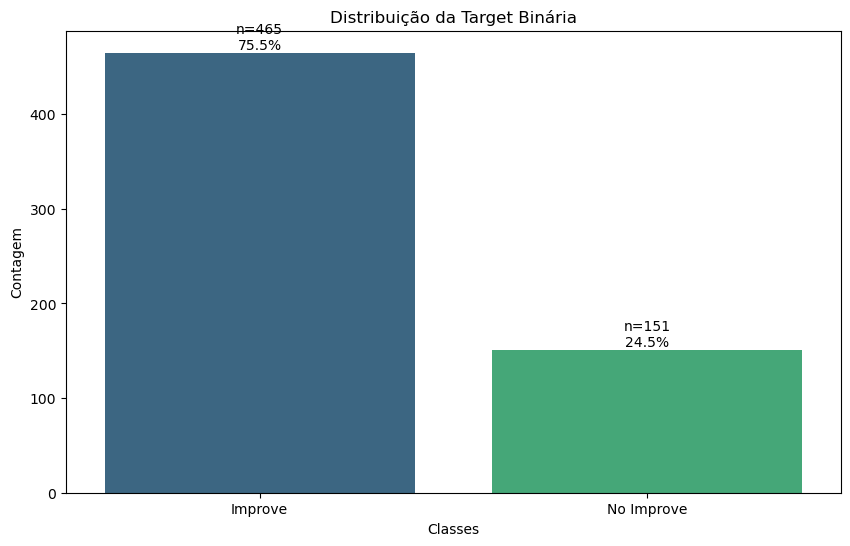

In [11]:
# Calcular contagens e percentuais
counts = df_relevantes['target_binary'].value_counts()
percentages = df_relevantes['target_binary'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Adicionar rótulos com contagem e percentual em cada barra
for i, (count, percentage) in enumerate(zip(counts.values, percentages)):
    bars.text(i, count, f'n={count}\n{percentage:.1f}%', 
             ha='center', va='bottom')

# Customizar o gráfico
plt.title('Distribuição da Target Binária')
plt.xlabel('Classes')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

In [12]:
df_relevantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 2 to 735
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            616 non-null    float64
 1   Fav genre      616 non-null    object 
 2   Anxiety        616 non-null    float64
 3   Depression     616 non-null    float64
 4   Insomnia       616 non-null    float64
 5   OCD            616 non-null    float64
 6   Music effects  616 non-null    object 
 7   target_binary  616 non-null    object 
dtypes: float64(5), object(3)
memory usage: 43.3+ KB


In [13]:
df_relevantes['target'] = (df_relevantes['target_binary'] == 'Improve').astype(int)
df_relevantes = pd.concat([df_relevantes, pd.get_dummies(df_relevantes['Fav genre'], prefix='genre')], axis=1)
df_relevantes = df_relevantes.drop(['Fav genre', 'Music effects', 'target_binary'], axis=1)

C:\Users\Eduardo Ramon\AppData\Local\Temp\ipykernel_14092\2456264984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevantes['target'] = (df_relevantes['target_binary'] == 'Improve').astype(int)


In [14]:
df_relevantes

,Age,Anxiety,Depression,Insomnia,OCD,target,genre_Classical,genre_Country,genre_EDM,genre_Folk,...,genre_Jazz,genre_K pop,genre_Latin,genre_Lofi,genre_Metal,genre_Pop,genre_R&B,genre_Rap,genre_Rock,genre_Video game music
2,18.0,7.0,7.0,10.0,2.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,61.0,9.0,7.0,3.0,3.0,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,18.0,7.0,2.0,5.0,9.0,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,18.0,8.0,8.0,7.0,7.0,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,18.0,4.0,8.0,6.0,0.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,7.0,6.0,0.0,9.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
732,18.0,3.0,2.0,2.0,5.0,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
733,19.0,2.0,2.0,2.0,2.0,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
734,19.0,2.0,3.0,2.0,1.0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


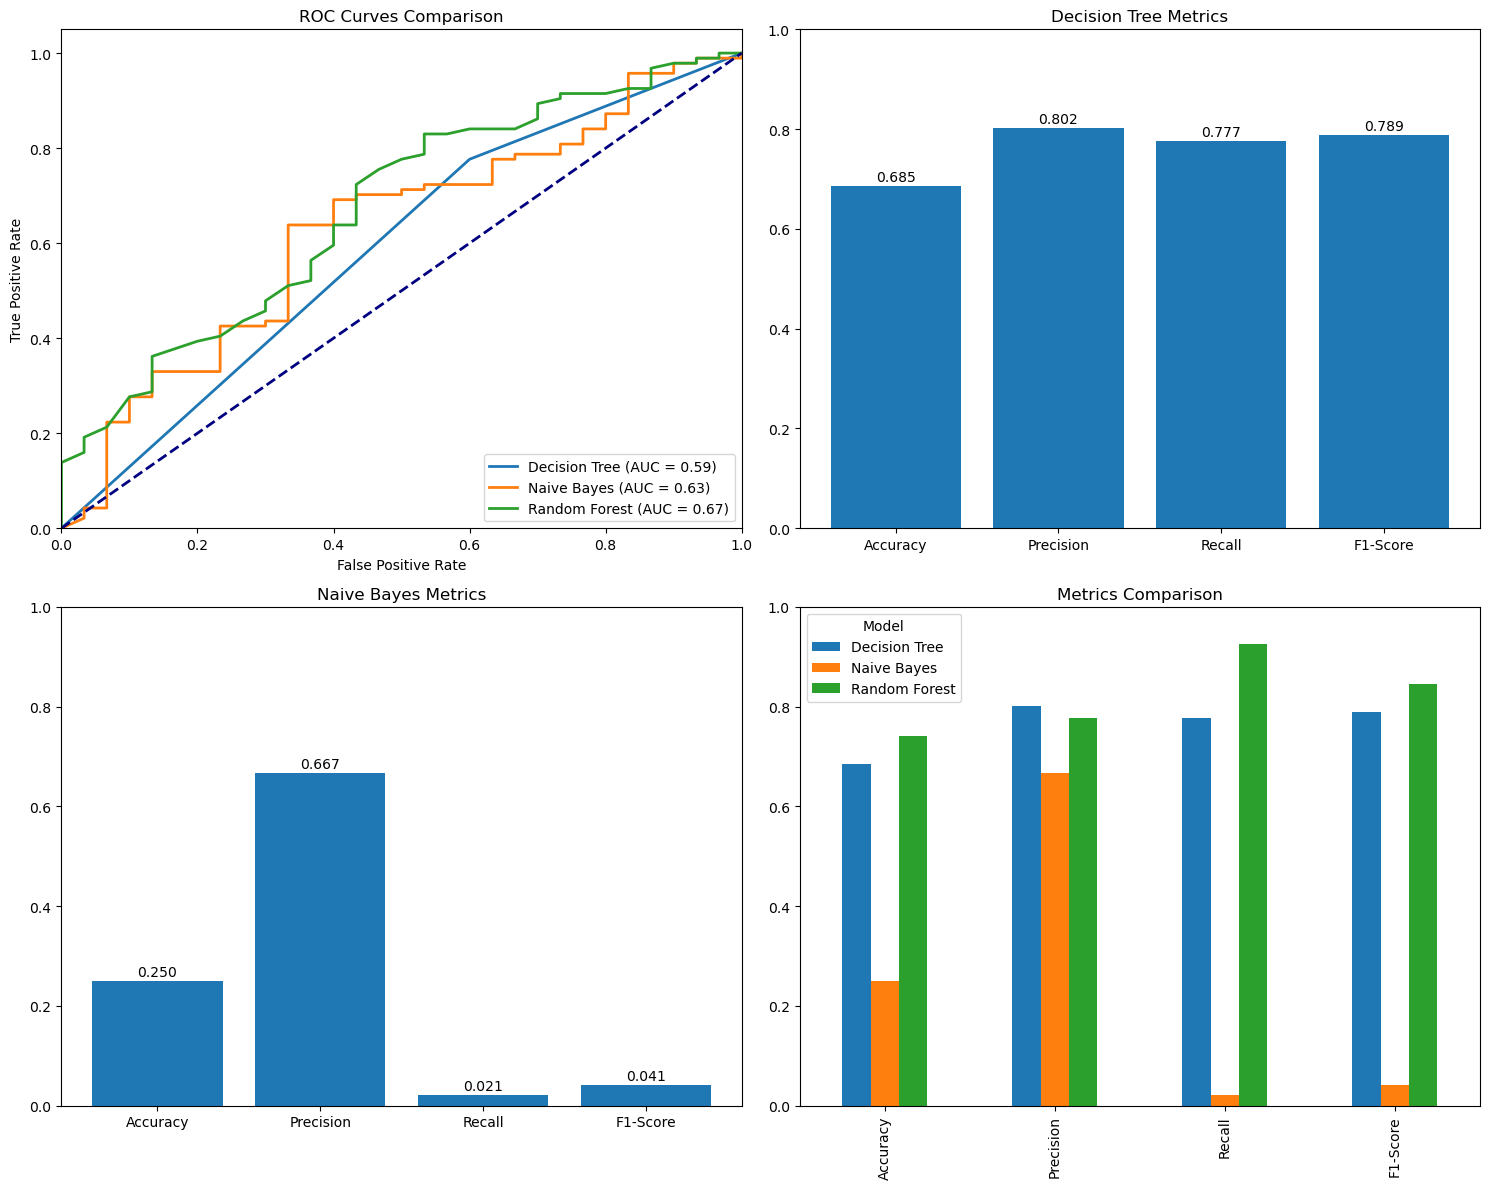


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        30
           1       0.80      0.78      0.79        94

    accuracy                           0.69       124
   macro avg       0.58      0.59      0.59       124
weighted avg       0.70      0.69      0.69       124


Decision Tree Métricas Principais:
Accuracy: 0.685
Precision: 0.802
Recall: 0.777
F1-Score: 0.789

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.97      0.38        30
           1       0.67      0.02      0.04        94

    accuracy                           0.25       124
   macro avg       0.45      0.49      0.21       124
weighted avg       0.56      0.25      0.12       124


Naive Bayes Métricas Principais:
Accuracy: 0.250
Precision: 0.667
Recall: 0.021
F1-Score: 0.041

Random Forest Classification Report:
              precision    recall  f1-

In [15]:

# Separar features (X) e target (y)
X = df_relevantes.drop('target', axis=1)
y = df_relevantes['target']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 50)

# Aplicar o scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar os modelos
dt = DecisionTreeClassifier(random_state=50)
nb = GaussianNB()
rd = RandomForestClassifier ()
models = {
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'Random Forest': rd
}

# Dicionário para armazenar resultados
results = {}

# Treinar e avaliar cada modelo
for name, model in models.items():
    # Treinar
    model.fit(X_train_scaled, y_train)
    
    # Predições
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular métricas
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'y_pred_proba': y_pred_proba,
        'y_pred': y_pred
    }

# Criar visualizações
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Curvas ROC
for name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves Comparison')
ax1.legend(loc="lower right")

# Plot 2 e 3: Métricas de avaliação para cada modelo
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Decision Tree metrics
dt_values = [results['Decision Tree'][metric] for metric in metrics_list]
ax2.bar(metrics_list, dt_values)
ax2.set_ylim([0, 1])
ax2.set_title('Decision Tree Metrics')
for i, v in enumerate(dt_values):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Naive Bayes metrics
nb_values = [results['Naive Bayes'][metric] for metric in metrics_list]
ax3.bar(metrics_list, nb_values)
ax3.set_ylim([0, 1])
ax3.set_title('Naive Bayes Metrics')
for i, v in enumerate(nb_values):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Plot 4: Comparação direta de métricas
metrics_comparison = pd.DataFrame(
    {name: [results[name][metric] for metric in metrics_list] for name in models.keys()},
    index=metrics_list
)
metrics_comparison.plot(kind='bar', ax=ax4)
ax4.set_title('Metrics Comparison')
ax4.set_ylim([0, 1])
ax4.legend(title='Model')

plt.tight_layout()
plt.show()

# Imprimir relatórios detalhados
for name in models.keys():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, results[name]['y_pred']))
    
    print(f"\n{name} Métricas Principais:")
    for metric in metrics_list:
        print(f"{metric}: {results[name][metric]:.3f}")

In [16]:
#Verificar a quantidade de linhas e colunas para treino
X_train.shape

(492, 21)

In [17]:
X_test.shape

(124, 21)

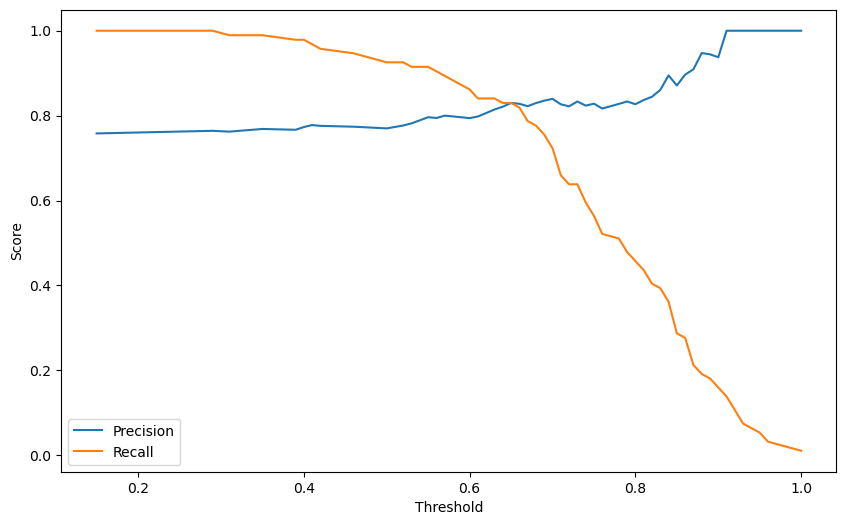

In [18]:
# Criar curva precisão e recall em função do ponto de corte.
precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(
    y_test, 
    results['Random Forest']['y_pred_proba']
)

plt.figure(figsize=(10, 6))
plt.plot(thresholds_dt, precisions_dt[:-1], label='Precision')
plt.plot(thresholds_dt, recalls_dt[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [36]:
# Fazendo otimização de hiperparâmetros para o modelo de random forest.
# Definindo o grid de parâmetros para teste
param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árvores
    'max_depth': [4, 5],          # Profundidade máxima arvore 
    'min_samples_split': [ 5, 10],          # Mínimo de amostras para dividir
    'min_samples_leaf': [ 5, 10],            # Mínimo de amostras em folhas
    'max_features': ['sqrt', 'log2']     # Número de features a considerar
}

# Criando o modelo base
rf_base = RandomForestClassifier(random_state=50)

# Criando e executando a busca em grid
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,                    # Número de folds na validação cruzada
    n_jobs=-1,              # Usar todos os cores disponíveis
    scoring='accuracy',      # Métrica para otimização
    verbose=1               # Mostrar progresso
)

# Treinando o modelo com todos os parâmetros
print("Iniciando busca em grid...")
grid_search.fit(X_train, y_train)

# Mostrando os melhores parâmetros encontrados
print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

# Pegando o melhor modelo
melhor_modelo = grid_search.best_estimator_

# Fazendo previsões com o melhor modelo (probabilidades)
y_prob = melhor_modelo.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
y_prob_train = melhor_modelo.predict_proba(X_train)[:, 1]  # Probabilidade da classe positiva

# Aplicando o limiar de 0,7 para transformar as probabilidades em classes
limiar = 0.7
y_pred = (y_prob >= limiar).astype(int)
y_pred_train = (y_prob_train >= limiar).astype(int)

# Avaliando o modelo otimizado
print("\nDesempenho do modelo otimizado:")
print(f"Acurácia: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nRelatório de classificação:")
print(classification_report(y_train, y_pred_train))

# Avaliando o modelo otimizado
print("\nDesempenho do modelo otimizado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

# Mostrando os resultados para cada combinação de parâmetros testada
resultados = pd.DataFrame(grid_search.cv_results_)
resultados_ordenados = resultados.sort_values('rank_test_score')
print("\nTop 5 melhores combinações de parâmetros:")
print(resultados_ordenados[['params', 'mean_test_score', 'std_test_score']].head())


Iniciando busca em grid...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Melhores parâmetros encontrados:
{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}

Desempenho do modelo otimizado:
Acurácia: 0.7744

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       121
           1       0.82      0.89      0.86       371

    accuracy                           0.77       492
   macro avg       0.69      0.65      0.66       492
weighted avg       0.76      0.77      0.76       492


Desempenho do modelo otimizado:
Acurácia: 0.7258

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        30
           1       0.81      0.83      0.82        94

    accuracy                           0.73       124
   macro avg       0.62      0.61      0.62       124
weighted a

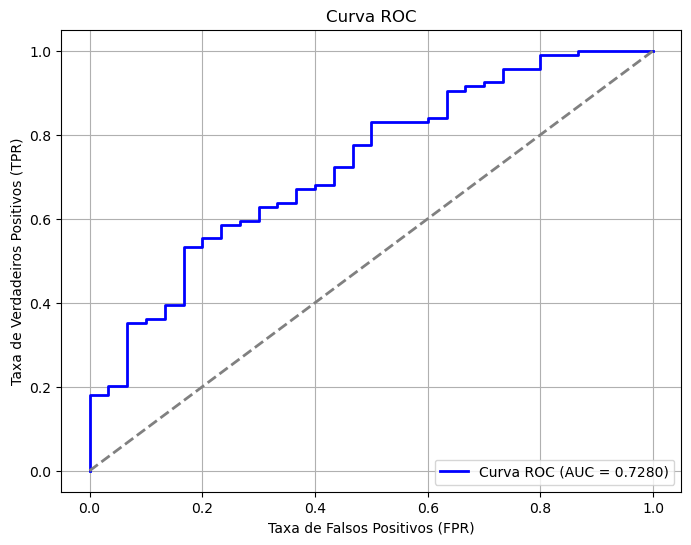

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fazendo previsões com o melhor modelo (probabilidades)
y_prob = melhor_modelo.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calculando FPR e TPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculando a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de base (aleatória)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


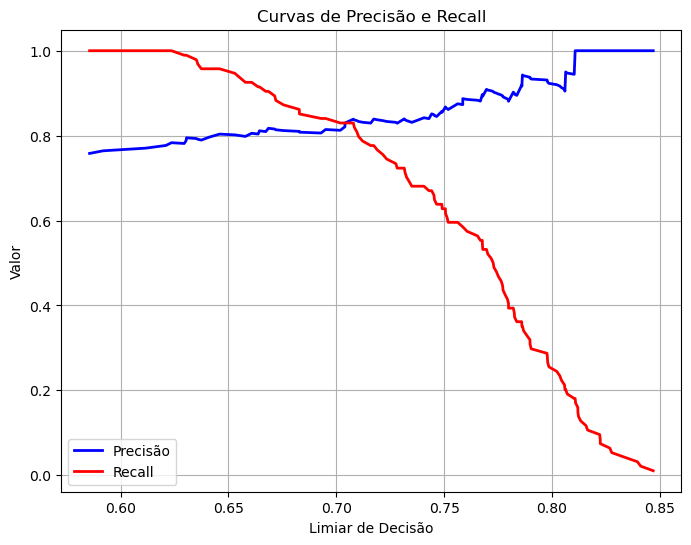

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Fazendo previsões com o melhor modelo (probabilidades)
y_prob = melhor_modelo.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calculando precisão, recall e os limiares
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plotando as curvas de precisão e recall
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], color='blue', lw=2, label='Precisão')
plt.plot(thresholds, recall[:-1], color='red', lw=2, label='Recall')
plt.xlabel('Limiar de Decisão')
plt.ylabel('Valor')
plt.title('Curvas de Precisão e Recall')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [42]:
# Salvando o modelo otimizado
import joblib
joblib.dump(melhor_modelo, 'random_forest_otimizado.joblib')
print("\nModelo salvo como 'random_forest_otimizado.joblib'")


Modelo salvo como 'random_forest_otimizado.joblib'
